In [2]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
#load datasete
df=pd.read_csv('social_data.csv')

In [4]:
#print first 5 rows of dataset
df.head()

,Published Date,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type
0,03-31-2023 19:55,CSGO,TWITTER,N/A,0,0,Text
1,03-31-2023 19:49,CSGO,TWITTER,N/A,0,0,Text
2,03-31-2023 19:49,CSGO,TWITTER,N/A,0,0,Text
3,03-31-2023 19:49,CSGO,TWITTER,N/A,0,0,Text
4,03-31-2023 19:43,CSGO,TWITTER,Community Engagement,9517,1215,Video


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Published Date     3479 non-null   object
 1   Account            3479 non-null   object
 2   Account Type       3479 non-null   object
 3   Campaign Name      3479 non-null   object
 4   Total Impressions  3479 non-null   int64 
 5   Total Engagements  3479 non-null   int64 
 6   Media Type         3479 non-null   object
dtypes: int64(2), object(5)
memory usage: 190.4+ KB


In [6]:
#find missing values in data
df=df.replace('N/A ',np.nan)

In [7]:
#check missing values 
df.isnull().sum()

Published Date          0
Account                 0
Account Type            0
Campaign Name        1485
Total Impressions       0
Total Engagements       0
Media Type              0
dtype: int64

# Observation:
    Campaign Name contains 1485 missing values

In [8]:
#using data where Total Engagements are greater than or equal to Total Impressions
df=df[df['Total Engagements']<=df['Total Impressions']]
df=df.reset_index(drop=True)

In [9]:
#general category appears multiple times  in Account column so i convrted it into single category
l=[]
for i in df['Account']:
    if i=='General ':
        a='General'
        l.append(a)
    else:
        a=i
        l.append(a)
df['Account']=l   

# 1:What is the typical engagement rate we can expect? What's the likelihood that we can achieve a 15% engagement rate?

In [10]:
# Calculate the engagement rate
df['Engagement Rate'] = (df['Total Engagements'] / df['Total Impressions']) * 100

# Calculate the typical engagement rate
typical_engagement_rate = df['Engagement Rate'].mean()

# Calculate the likelihood of achieving a 15% engagement rate
likelihood_15_percent = (df['Engagement Rate'] >= 15).mean() * 100

print("Typical Engagement Rate: {:.2f}%".format(typical_engagement_rate))
print("Likelihood of achieving a 15% engagement rate: {:.2f}%".format(likelihood_15_percent))

Typical Engagement Rate: 5.35%
Likelihood of achieving a 15% engagement rate: 6.42%


# 2:Does the day of the week and time of posting affect engagement rates?



In [13]:
# Extract the day of the week and hour from the 'Published Date' column
df['Published Date'] = pd.to_datetime(df['Published Date'])
df['Day of Week'] = df['Published Date'].dt.day_name()
df['Hour'] = df['Published Date'].dt.hour
df['month'] = df['Published Date'].dt.month

engagement_by_day = df.groupby('Day of Week').agg({'Engagement Rate': 'mean'})
engagement_by_day = engagement_by_day.sort_values(by='Engagement Rate', ascending=False)


engagement_by_month= df.groupby('month').agg({'Engagement Rate': 'mean'})
engagement_by_month = engagement_by_month.sort_values(by='Engagement Rate', ascending=False)


engagement_by_hour = df.groupby('Hour').agg({'Engagement Rate': 'mean'})


In [14]:
engagement_by_day

,Engagement Rate
Day of Week,
Tuesday,6.535451
Thursday,6.103462
Sunday,5.897657
Friday,5.087298
Monday,4.517345
Wednesday,4.453678
Saturday,3.779530


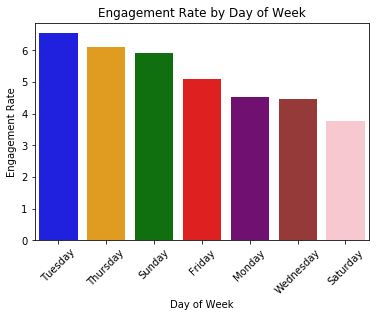

In [15]:
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink']

# Plot using Seaborn
sns.barplot(x=engagement_by_day.index, y='Engagement Rate', data=engagement_by_day, palette=colors)

# Set plot title and labels
plt.title('Engagement Rate by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Engagement Rate')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

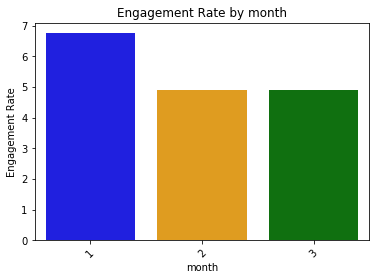

In [16]:
colors = ['blue', 'orange', 'green']

# Plot using Seaborn
sns.barplot(x=engagement_by_month.index, y='Engagement Rate', data=engagement_by_month, palette=colors)

# Set plot title and labels
plt.title('Engagement Rate by month')
plt.xlabel('month')
plt.ylabel('Engagement Rate')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

In [17]:
engagement_by_month

,Engagement Rate
month,
1,6.758930
3,4.912496
2,4.890005


<Figure size 576x432 with 0 Axes>

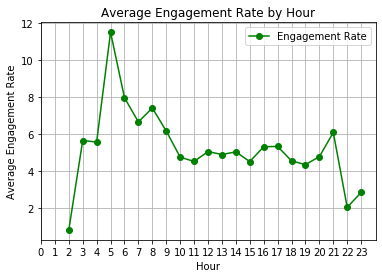

In [18]:
plt.figure(figsize=(8, 6))
engagement_by_hour.plot(kind='line', marker='o', color='green')
plt.xlabel('Hour')
plt.ylabel('Average Engagement Rate')
plt.title('Average Engagement Rate by Hour')
plt.xticks(range(24))
plt.grid(True)
plt.show()

In [19]:
engagement_by_hour

,Engagement Rate
Hour,
0,NaN
2,0.840156
3,5.656221
4,5.575346
5,11.488999
6,7.962271
7,6.656849
8,7.409689
9,6.166991


# Observations:

Tuesday has the highest average engagement rate with 6.54%, followed by Thursday with 6.10% and Sunday with 5.90%.
Saturday has the lowest average engagement rate with 3.78%.
Wednesday has a relatively lower average engagement rate compared to other days of the week.

The engagement rates are relatively low during the early morning hours (0-3 am) and late evening hours (9-11 pm).
The highest average engagement rates are observed during the mid-morning hours (5-7 am) and late afternoon hours (3-5 pm).
There is a gradual decline in average engagement rates from the mid-morning hours until the late evening hours.
These observations suggest that both the day of the week and hour of posting can have an impact on engagement rates. Tuesdays, Thursdays, and Sundays tend to have higher average engagement rates, while Saturdays have lower average engagement rates. In terms of the hour of the day, mid-morning and late afternoon hours generally have higher engagement rates compared to early morning and late evening hours.

January has the highest average engagement rate at 6.76%, suggesting that posts published in January tend to generate higher engagement.
March and February have similar average engagement rates, both around 4.90%.

# 3:How are our game titles doing in terms of social performance? Is there a specific game we should focus more on or less?


In [48]:
data_game_titles = df.loc[(df['Account'] == 'CSGO') | (df['Account'] == 'DOTA2') | (df['Account'] == 'Valorant')]
game_performance_1 = data_game_titles.groupby('Account').agg({'Engagement Rate': 'mean'})


In [49]:

# Create a bar plot using Plotly with different colors for each category
fig = px.bar( x=game_performance_1.index, y=game_performance_1['Engagement Rate'], color=game_performance.index)

# Customize the plot layout
fig.update_layout(
    title='Social Performance by Game Titles Engagement Rate',
    xaxis_title='Game Titles',
    yaxis_title='Engagement Rate'
)

# Show the interactive plot
fig.show()

In [37]:
game_performance_1

,Engagement Rate
Account,
Valorant,5.337990
DOTA2,4.944886
CSGO,4.132564


In [50]:
game_performance_2 = data_game_titles.groupby('Account').agg({'Total Engagements': 'mean'})


In [51]:
# Create a bar plot using Plotly with different colors for each category
fig = px.bar( x=game_performance_2.index, y=game_performance_2['Total Engagements'], color=game_performance.index)

# Customize the plot layout
fig.update_layout(
    title='Social Performance by Game Titles Total Engagements',
    xaxis_title='Game Titles',
    yaxis_title='Total Engagements'
)

# Show the interactive plot
fig.show()

In [54]:
data_CSGO = df[df['Account']== 'CSGO']
data_DOTA2 = df[df['Account']== 'DOTA2']
data_General = df[df['Account']== 'General']
data_Valorant = df[df['Account']== 'Valorant']
data_ContentCreators = df[df['Account']== 'Content Creators']

In [65]:
data_CSGO.groupby(['Account Type','Media Type']).agg({'Engagement Rate': 'mean','Media Type':'count'})

Engagement Rate  Media Type
Account Type Media Type                             
TWITTER      Link               1.172803          20
             Photo              2.337434         139
             Text               3.449996          62
             Video             10.961795          49

In [66]:
data_DOTA2.groupby(['Account Type','Media Type']).agg({'Engagement Rate': 'mean','Media Type':'count'})

Engagement Rate  Media Type
Account Type Media Type                             
TWITTER      Link               5.613076           9
             Mixed             16.732484           2
             Photo              5.193406         331
             Text               3.644603         343
             Video              7.734873         110
YOUTUBE      Video              5.011636           8

In [67]:
data_Valorant.groupby(['Account Type','Media Type']).agg({'Engagement Rate': 'mean','Media Type':'count'})

Engagement Rate  Media Type
Account Type Media Type                             
YOUTUBE      Link                    NaN           2
             Text                    NaN          15
             Video               5.33799          43

# Observation:

Valorant: The "Valorant" game title has an average engagement rate of 5.34%. It has the highest engagement rate among the three game titles. However, when I compare the total engagements, it turns out to have the lowest total engagements, which means that there are not enough contents posted by Valorant account. Valorant account should focus on promoting the content can help further enhance its engagement and reach.

We should focus to post more Valorant contents, and tried to opened a twitter account for Valorant to increase the total engagements. 

DOTA2: The "DOTA2" game title has an average engagement rate of 4.94%. While it is lower than the top-performing game titles, it still indicates a decent level of social engagement. It is worth considering strategies to boost the engagement for "DOTA2" content to bring it closer to the top-performing game titles.

we should try to include photos on twitter post by DOTA2 account to increase the engagement rate. 


CSGO: The "CSGO" game title has the lowest average engagement rate among the provided game titles, with a rate of 4.13%. However, CSGO has the highest total engagements which means there are many contents posted by the CSGO account. This suggests that the content posted by CSGO may require some attention to improve its social performance and increase the engagement rates. 

We should start a Youtube Channel for CSGO, and tried to post more videos on CSGO twitter account to increase the engagement rates. 








# 4:What media type performs the best?


In [52]:
group=df.groupby('Account Type')
for acc_name,acc_df in group:
    
    # Group by media type and calculate the average engagement rate
    media_performance = acc_df.groupby('Media Type')['Engagement Rate'].mean().reset_index()
    media_performance = media_performance.sort_values(by='Engagement Rate', ascending=False)
 

    # Create a bar plot using Plotly with different colors for each category
    fig = px.bar(media_performance, x='Media Type', y='Engagement Rate', color='Media Type')

    # Customize the plot layout
    fig.update_layout(
        title=acc_name,
        xaxis_title='Media Type',
        yaxis_title='Average Engagement Rate'
    )

    # Show the interactive plot
    fig.show()

# Observation:


FBPAGE:The media type "Album" has the highest engagement rate of 40.00% for FBPAGE accounts, indicating that posts with albums perform the best.Text, photo, and video media types also show relatively high engagement rates, ranging from 15.06% to 16.32%.


INSTAGRAM:Among the available media types, the "Carousel" media type has the highest engagement rate of 3.78% for INSTAGRAM accounts.
Photo and video media types also show engagement rates of 0.83% and 1.15% respectively.


LINKEDIN_COMPANY:For LINKEDIN_COMPANY accounts, the video media type demonstrates the highest engagement rate of 2.48%.
Link and photo media types also exhibit relatively good engagement rates, ranging from 1.31% to 2.48%.


TIKTOK_BUSINESS:The video media type has an engagement rate of 5.36%.


TWITTER:Among the available media types, the "Mixed" media type has the highest engagement rate of 10.77% for TWITTER accounts.
Video, link, and text media types also demonstrate engagement rates ranging from 3.35% to 5.74%.


YOUTUBE:The video media type has engagement rate of 4.47% for YOUTUBE accounts.


These observations highlight the media types that perform the best for each account type. It's important to consider these insights when planning social media strategies and content creation for each platform. However, please note that the engagement rates for some media types might be missing (NaN) in certain account types, indicating a lack of available data for those combinations.

# 5:What is our best performing campaign?


In [69]:
# Group by campaign name and calculate the total engagements
campaign_performance = df.groupby('Campaign Name')['Total Engagements'].sum().reset_index()
campaign_performance = campaign_performance.sort_values(by='Total Engagements', ascending=False)

fig = px.bar(campaign_performance, x='Campaign Name', y='Total Engagements',color='Campaign Name')

# Customize the plot layout
fig.update_layout(
    title='Total Engagements by Campaign',
    xaxis_title='Campaign Name',
    yaxis_title='Total Engagements'
)

# Show the interactive plot
fig.show()

In [22]:
campaign_performance

,Campaign Name,Total Engagements
0,Community Engagement,2044767
2,Evil Exhibited,185305
1,Evergreen,43127


# Observation:

Community Engagement: The campaign named "Community Engagement" has the highest total engagements with 2 million. This indicates that the "Community Engagement" campaign has been highly successful in generating social engagement.

Evil Exhibited: The campaign named "Evil Exhibited" has the second-highest total engagements with 185k. While it is lower compared to the "Community Engagement" campaign, it still shows a significant level of social performance.

Evergreen: The campaign named "Evergreen" has a relatively lower total engagements of 43k. Although it has fewer engagements compared to the top two campaigns, it still demonstrates a reasonable level of social engagement.

"Community Engagement" campaign has been the best-performing campaign, generating the highest level of social engagement. The "Evil Exhibited" campaign also shows a good level of engagement, while the "Evergreen" campaign has a lower level of engagements but still has a reasonable performance.

# 6:Define a posting strategy for our social channels based on your discoveries:

Based on the observations from the previous analyses, we can define a posting strategy for our social channels that takes into account the following discoveries:

Consider the day of the week: Analysis of the participant population by day of the week revealed changes in performance. Engagement rates were highest on Tuesdays, Thursday, and Sunday, consider prioritizing products and posts on high-engagement days.

Optimize posting time: An hourly analysis of engagement rates showed that engagement rates varied throughout the day. To maximize the reach and impact of posts, consider posting at peak times, such as early morning, mid-morning, and late evening.

Utilize Engaging Media Types: The analysis of media types reveals that certain types perform better than others on specific platforms. 

For FBPAGE accounts, consider utilizing albums, photos, and videos as they have shown higher engagement rates.

For INSTAGRAM accounts, focus on creating carousel posts, photos, and videos to maximize engagement.

For LINKEDIN_COMPANY accounts, prioritize video, link, and photo content for better engagement.

For TWITTER accounts, experiment with mixed media types, including videos, links, and text, to maximize engagement.


# 7:What suggestions would you give to the social media team if they want to expand their presence (e.g., if our CSGO YouTube channel is doing well, should we expand to TikTok)?

I would give 
1. Valorant relatively higher engagement rates, indicating a positive response from the audience. However, the total engagements of Valorant is a bit lower, so we should focus on posting more Valorant contents. 

2. CSGO should focus on start more account rather than simply rely on twitter account. Also, CSGO should include visuals when we post.

3. DOTA2 should focus more on the post more contents on different platforms to increase the team awareness. 

